# PyEddyTracker - Model Evaluation
## CONTENTS;
### 1. Load in data
This notebook will obtain the eddy tracking data and explore different ways to visualise this output. 

In [1]:
from datetime import datetime

from matplotlib import pyplot as plt
from numpy import arange

from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.eddy_feature import Contours

from py_eddy_tracker.observations.network import NetworkObservations
from py_eddy_tracker.observations.observation import EddiesObservations, Table
from py_eddy_tracker.observations.tracking import TrackEddiesObservations

from py_eddy_tracker.data import get_remote_demo_sample
from py_eddy_tracker.featured_tracking.area_tracker import AreaTracker
from py_eddy_tracker.gui import GUI
from py_eddy_tracker.tracking import Correspondances

import xarray as xr
import glob
from netCDF4 import Dataset
from datetime import timedelta
import numpy as np



In [2]:
# set paths to model output
adt_datapath = '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/'
## SRM
# eac_003 = '/scratch/v45/jr5971/mom6-setonix/eac_iaf_003/'
eac_003 = adt_datapath + 'eac_eta_1990-2000.nc'
## LRM
# sthpac_01 = '/scratch/v45/jr5971/mom6-setonix/sthpac_iaf_01/'
sthpac_01 = adt_datapath + 'sthpac_eta_sub.nc'
## PARENT
# access = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v150_iaf_cycle1/'
om2_01 = adt_datapath + 'om2_eta_1990-2020.nc' 

## Track Eddies
1. Get file list for both AC and CC eddies
2. Setup eddy tracking results

In [7]:
# 1. get detection file lists
ac_files = glob.glob(adt_datapath+'id-eddies_eac-003-filtered-dask/AC*.nc')
cc_files = glob.glob(adt_datapath+'id-eddies_eac-003-filtered-dask/CC*.nc')
ac_files.sort(); cc_files.sort()
print(len(ac_files), len(cc_files))

3776 3776


In [8]:
ac_files

['/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/id-eddies_eac-003-filtered-dask/AC_19900202.nc',
 '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/id-eddies_eac-003-filtered-dask/AC_19900203.nc',
 '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/id-eddies_eac-003-filtered-dask/AC_19900204.nc',
 '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/id-eddies_eac-003-filtered-dask/AC_19900205.nc',
 '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/id-eddies_eac-003-filtered-dask/AC_19900206.nc',
 '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/id-eddies_eac-003-filtered-dask/AC_19900207.nc',
 '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/id-eddies_eac-003-filtered-dask/AC_19900208.nc',
 '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/id-eddies_eac-003-filtered-dask/AC_19900209.nc',
 '/home/

In [9]:
polarity = "CC"
start_date = datetime(1990,2,2)
end_date = datetime(2000,7,1)
# Generate a list of expected file names
filepath = "/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/id-eddies_eac-003-filtered-dask/"
expected_files = [f"{filepath}{polarity}_{(start_date+timedelta(days=i)).strftime('%Y%m%d')}.nc" for i in range((end_date-start_date).days+1)]
# # find the missing files
missing_files = [file for file in expected_files if file not in cc_files]

In [10]:
# Identify missing files and store their indices
missing_indices = [i for i,file in enumerate(expected_files) if file not in cc_files]
len(missing_indices)

27

In [11]:
missing_indices

[46,
 73,
 470,
 508,
 546,
 717,
 833,
 851,
 858,
 1190,
 1696,
 1709,
 1943,
 2044,
 2390,
 2571,
 2646,
 2744,
 2759,
 2767,
 2911,
 2964,
 3065,
 3304,
 3376,
 3388,
 3646]

So, now with all these files that were missed, I need to go back and use the detection algorithm on these. 
How do we only select the files that were missed?

In [12]:
# 2. Setup eddy tracking results
tracking_method = None
a = Correspondances(datasets=ac_files[:100], class_method=tracking_method, virtual=3)
c = Correspondances(datasets=cc_files[:100], class_method=tracking_method, virtual=3)

a.track(); c.track()
a.prepare_merging(); c.prepare_merging()
# we now have an eddy object
ac_eddytracks = a.merge(raw_data=False)
cc_eddytracks = c.merge(raw_data=False)

ac_eddytracks.virtual[:] = ac_eddytracks.time==0
cc_eddytracks.virtual[:] = cc_eddytracks.time==0

ac_eddytracks.filled_by_interpolation(ac_eddytracks.virtual==1)
cc_eddytracks.filled_by_interpolation(cc_eddytracks.virtual==1)

High number of conflict : 4 (nb_conflict)
High number of conflict : 15 (nb_conflict)
High number of conflict : 6 (nb_conflict)
High number of conflict : 7 (nb_conflict)
High number of conflict : 6 (nb_conflict)
High number of conflict : 9 (nb_conflict)
High number of conflict : 9 (nb_conflict)
High number of conflict : 10 (nb_conflict)
High number of conflict : 9 (nb_conflict)
High number of conflict : 7 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 11 (nb_conflict)
High number of conflict : 14 (nb_conflict)
High number of conflict : 15 (nb_conflict)
High number of conflict : 11 (nb_conflict)
High number of conflict : 11 (nb_conflict)
High number of conflict : 12 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 9 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 

In [13]:
print(ac_eddytracks)

/mnt/c/Users/johnr/OneDrive - University of Tasmania/Documents/phd_folder/gadi_notebooks/py-eddy-tracker/src/py_eddy_tracker/observations/observation.py:278: RuntimeWarning: invalid value encountered in true_divide
  v /= hist_numba(x, bins=bins)[0]


    | 1995 observations from 14642 to 14743 (102 days, ~20 obs/day)
    |   Speed area      : 0.15 Mkm²/day
    |   Effective area  : 0.24 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :       1.70     30.03     15.24      8.22      4.61     19.00     21.20
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       1.10     17.54     30.23     23.91     15.09      9.77      2.36      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       0.10     12.23     17.09     19.55     19.70     20.70     10.63      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00    

In [14]:
print(cc_eddytracks)

    | 1871 observations from 14642 to 14743 (102 days, ~18 obs/day)
    |   Speed area      : 0.12 Mkm²/day
    |   Effective area  : 0.20 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :       1.34     25.33     16.73     12.13      6.15     19.51     18.81
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       3.53     20.47     30.79     23.52     14.22      5.83      1.66      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       0.75     10.48     18.60     25.01     22.18     15.29      7.70      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00    

## AVISO
Load SSH Data (starting with AVISO)

In [4]:
adt_aviso = xr.open_dataset(adt_datapath + 'cmems-sealevel-adt.nc')
adt_aviso

<xarray.Dataset>
Dimensions:    (time: 10016, longitude: 86, latitude: 81)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-06-03
  * longitude  (longitude) float32 140.6 140.9 141.1 141.4 ... 161.4 161.6 161.9
  * latitude   (latitude) float32 -46.12 -45.88 -45.62 ... -26.62 -26.38 -26.12
Data variables:
    adt_cmems  (time, latitude, longitude) float64 ...

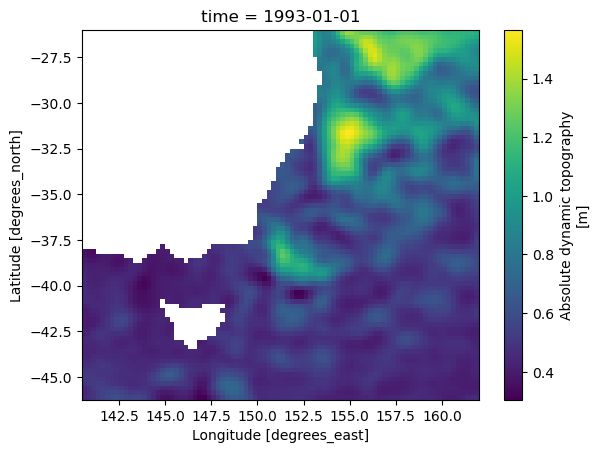

In [5]:
adt_aviso['adt_cmems'].isel(time=0).plot()

### Run ID algorithm (`eddy_identification`)

Okay, so the previous attempt failed because each individual map was the exact same. This stems from the fact that we set up this `RegularGridDataset` object with the full-time adt data rather than an individual snapshot. There's two options now:
1. Investigate whether some 'indexs' argument to `RegularGridDataset` could help
2. Select individual snapshots, re-save these and then try the slighly modified algorithm. 

So, I've now saved a years worth of individual dates using a bash script we've called `split-by-frame.sh`. Let's now loop through these, and save the eddy results that way...

In [46]:
# get file list of adt dates
adt_files = glob.glob(adt_datapath + 'framexframe/*')
adt_files.sort()
adt_files[:4]

['/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/framexframe/cmems_adt_000.nc',
 '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/framexframe/cmems_adt_001.nc',
 '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/framexframe/cmems_adt_002.nc',
 '/home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/framexframe/cmems_adt_003.nc']

In [47]:
len(adt_files)

365

### Loop through snapshots and save eddy-id output

In [48]:
range(100,365)

range(100, 365)

In [49]:
start_date = datetime(1993,1,1)

for i in range(100,365):
    current_date = start_date + timedelta(days=i)
    adt_snap = RegularGridDataset(
        filename=adt_files[i],
        x_name='longitude',
        y_name='latitude'
    )
    adt_snap.add_uv('adt_cmems', 'ugos', 'vgos')
    a,c = adt_snap.eddy_identification(
        'adt_cmems',
        'ugos',
        'vgos',
        date=current_date
    )

    with Dataset(current_date.strftime(adt_datapath+'id-eddies/AC_%Y%m%d.nc'), 'w') as ncfile:
        a.to_netcdf(ncfile)
    with Dataset(current_date.strftime(adt_datapath+'id-eddies/CC_%Y%m%d.nc'), 'w') as ncfile:
        c.to_netcdf(ncfile)


We assume pixel position of grid is centered for /home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/framexframe/cmems_adt_100.nc
/home/johnr/anaconda3/envs/eddyTrack-env.3.5/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
We assume pixel position of grid is centered for /home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/framexframe/cmems_adt_101.nc
We assume pixel position of grid is centered for /home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/framexframe/cmems_adt_102.nc
We assume pixel position of grid is centered for /home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/framexframe/cmems_adt_103.nc
We assume pixel position of grid is centered for /home/johnr/utas/Documents/phd_folder/gadi_notebooks/data/subsetted_data/framexframe/cmems_adt_104.nc
We assume pixel position of grid is centered 

### Examine output of Eddy-ID

In [50]:
CC_eddies = glob.glob(adt_datapath+'id-eddies/CC*.nc')
CC_eddies.sort()
len(CC_eddies)

365

In [51]:
cc_data = []
for snapshot in CC_eddies:
    cc = TrackEddiesObservations.load_file(snapshot)
    cc_data.append(cc)
len(cc_data)

365

In [52]:
print(cc_data[0])

    | 36 observations from 15706 to 15706 (1 days, ~36 obs/day)
    |   Speed area      : 0.22 Mkm²/day
    |   Effective area  : 0.25 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :       2.78     19.44     13.89     30.56      5.56     11.11     16.67
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       0.00      5.56     52.78     22.22     16.67      0.00      2.78      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       0.00      5.56     44.44     27.78     11.11      8.33      2.78      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00    -15.

/mnt/c/Users/johnr/OneDrive - University of Tasmania/Documents/phd_folder/gadi_notebooks/py-eddy-tracker/src/py_eddy_tracker/observations/observation.py:278: RuntimeWarning: invalid value encountered in true_divide
  v /= hist_numba(x, bins=bins)[0]


In [19]:
def plot_eddy_track(i):
    # fig = plt.figure(figsize=(5,5))
    # ax = fig.add_subplot()
    cc_data[i].display(ax)
    cc_data[i].circle_contour()
    cc_data[i].display(ax)
    # ax.set_title(

In [55]:
np.arange(0,100,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

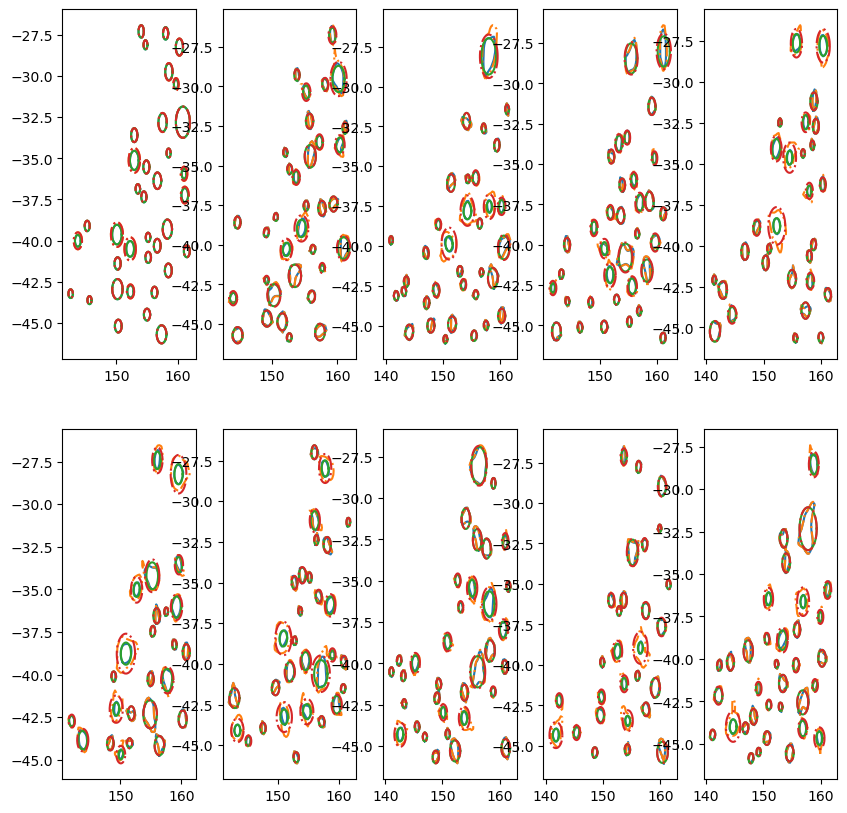

In [57]:
fig = plt.figure(figsize=(10,10))
for i, index in enumerate(np.arange(0,300,30)):
    ax = plt.subplot(2,5, i+1)
    plot_eddy_track(index)

## Track eddies

In [58]:
from py_eddy_tracker.data import get_remote_demo_sample
from py_eddy_tracker.featured_tracking.area_tracker import AreaTracker
from py_eddy_tracker.gui import GUI
from py_eddy_tracker.tracking import Correspondances

In [11]:
c = Correspondances(datasets=cc_files[:100], class_method=AreaTracker,
                    virtual=3)
c.track()
c.prepare_merging()
# we now have an eddy object
eddies_area_tracker = c.merge(raw_data=False)
eddies_area_tracker.virtual[:] = eddies_area_tracker.time == 0
eddies_area_tracker.filled_by_interpolation(eddies_area_tracker.virtual==1)

In [12]:
print(eddies_area_tracker)

    | 3300 observations from 15706 to 15805 (100 days, ~33 obs/day)
    |   Speed area      : 0.21 Mkm²/day
    |   Effective area  : 0.28 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :       1.27     21.88     18.36     14.39      8.18     21.33     14.58
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       0.00      9.18     46.06     27.67     10.45      4.97      1.67      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       0.00      8.52     37.15     26.33     14.45      8.70      4.85      0.00
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00    

/mnt/c/Users/johnr/OneDrive - University of Tasmania/Documents/phd_folder/gadi_notebooks/py-eddy-tracker/src/py_eddy_tracker/observations/observation.py:278: RuntimeWarning: invalid value encountered in true_divide
  v /= hist_numba(x, bins=bins)[0]


In [13]:
c = Correspondances(datasets=cc_files[:100], virtual=3)
c.track()
c.prepare_merging()
eddies_default_tracker = c.merge(raw_data=False)
eddies_default_tracker.virtual[:] = eddies_default_tracker.time == 0
eddies_default_tracker.filled_by_interpolation(eddies_default_tracker.virtual == 1)

High number of conflict : 12 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 18 (nb_conflict)
High number of conflict : 17 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 8 (nb_conflict)


In [62]:
eddies_area_tracker.position_filter(median_half_window=1, loess_half_window=5)

In [63]:
# select box
x0, x1, y0, y1 = 155, 158, -30, -28
area = dict(llcrnrlon=x0, llcrnrlat=y0, urcrnrlon=x1, urcrnrlat=y1)
eddy_subset = eddies_area_tracker.extract_with_area(area, full_path=True)

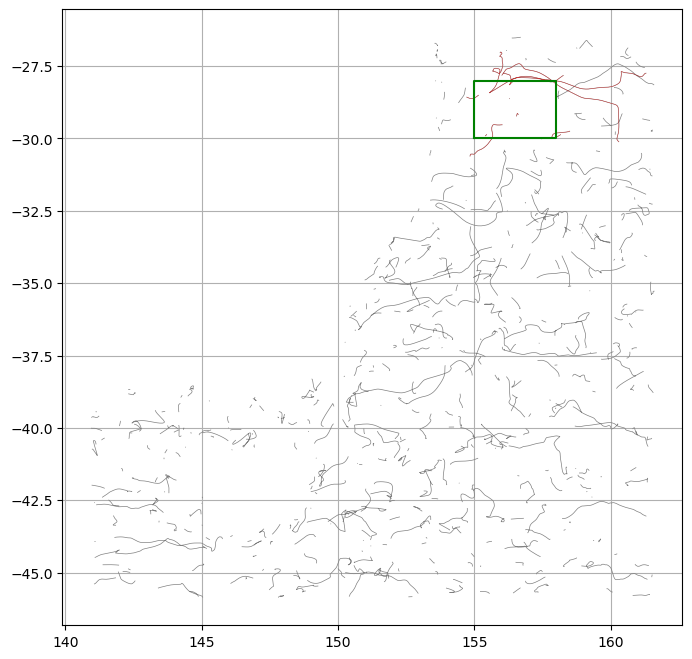

In [64]:
fig, ax = plt.subplots(figsize=(8,8))
ax.grid()
eddies_area_tracker.plot(ax, color='grey', lw=0.5, ref=-10, label="All tracks")
eddy_subset.plot(
    ax, color='r', lw=0.2, ref=-10, label="selected tracks"
)
ax.plot(
    (x0, x0, x1, x1, x0),
    (y0, y1, y1, y0, y0),
    color='g',
    lw=1.5,
    label='Box of selection'
)

Okay, so the above is handy say if we wanted to know how many of the eddies ended up in the EAC extension started upstream? Or something like that...

In [31]:
eddy = eddies_area_tracker.extract_ids([2])
eddy_f = eddies_area_tracker.extract_ids([2])
eddy_f.position_filter(median_half_window=1, loess_half_window=5)

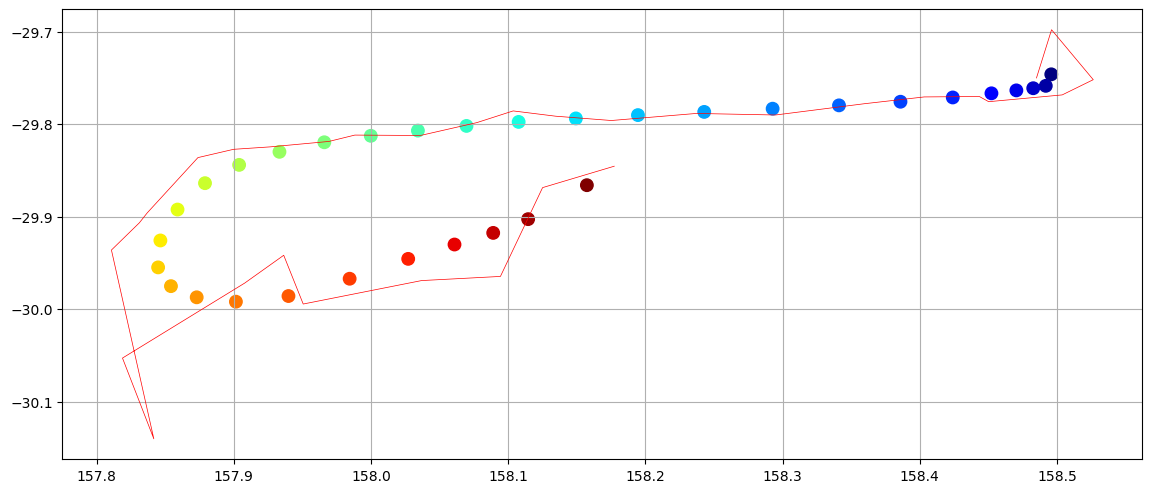

In [32]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes((0.05, 0.05, 0.9, 0.9))
ax.grid()
eddy.plot(ax, color='r', lw=0.5)
eddy_f.scatter(ax, 'n', cmap='jet', s=80)

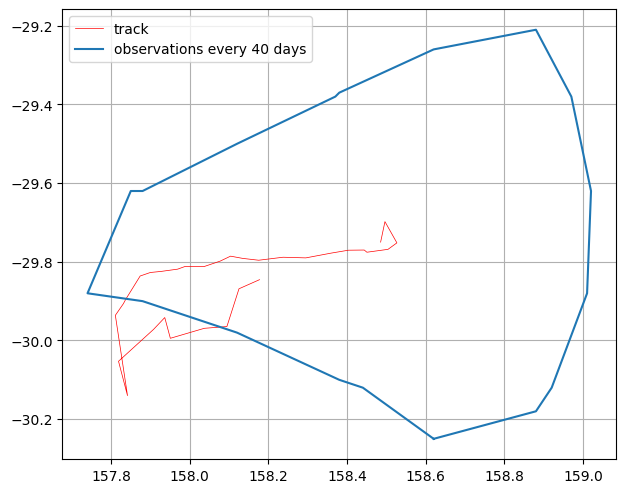

In [33]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes((0.05, 0.05, 0.9, 0.9))

ax.set_aspect("equal")
ax.grid()
eddy.plot(ax, color="r", lw=0.5, label="track")
eddy.index(range(0, len(eddy), 100)).display(
    ax, intern_only=True, label="observations every 40 days"
)
ax.legend()

## Track eddies

### Examine output of Eddy-ID

In [65]:
AC_eddies = glob.glob(adt_datapath+'id-eddies/AC*.nc')
AC_eddies.sort()
len(AC_eddies)

365

In [66]:
a = Correspondances(datasets=AC_eddies, class_method=AreaTracker,
                    virtual=3)
a.track()
a.prepare_merging()
# we now have an eddy object
eddies_area_tracker = a.merge(raw_data=False)
eddies_area_tracker.virtual[:] = eddies_area_tracker.time == 0
eddies_area_tracker.filled_by_interpolation(eddies_area_tracker.virtual==1)

In [67]:
a = Correspondances(datasets=AC_eddies, virtual=3)
a.track()
a.prepare_merging()
eddies_default_tracker = a.merge(raw_data=False)
eddies_default_tracker.virtual[:] = eddies_default_tracker.time == 0
eddies_default_tracker.filled_by_interpolation(eddies_default_tracker.virtual == 1)

High number of conflict : 4 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 12 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 4 (nb_conflict)
High number of conflict : 8 (nb_conflict)
High number of conflict : 4 (nb_c

In [68]:
print(eddies_area_tracker)

    | 10515 observations from 15706 to 16070 (365 days, ~29 obs/day)
    |   Speed area      : 0.28 Mkm²/day
    |   Effective area  : 0.40 Mkm²/day
    ----Distribution in Amplitude:
    |   Amplitude bounds (cm)        0.00      1.00      2.00      3.00      4.00      5.00     10.00    500.00
    |   Percent of eddies         :       0.87     16.57     13.88      9.54      6.85     23.37     28.93
    ----Distribution in Radius:
    |   Speed radius (km)            0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       0.00      5.09     33.18     27.87     16.50     12.86      4.50      0.00
    |   Effective radius (km)        0.00     15.00     30.00     45.00     60.00     75.00    100.00    200.00   2000.00
    |   Percent of eddies         :       0.00      4.61     24.95     21.23     16.38     18.80     13.85      0.19
    ----Distribution in Latitude
        Latitude bounds            -90.00    -60.00   

/mnt/c/Users/johnr/OneDrive - University of Tasmania/Documents/phd_folder/gadi_notebooks/py-eddy-tracker/src/py_eddy_tracker/observations/observation.py:278: RuntimeWarning: invalid value encountered in true_divide
  v /= hist_numba(x, bins=bins)[0]


In [69]:
eddies_area_tracker.position_filter(median_half_window=1, loess_half_window=5)

In [70]:
# select box
x0, x1, y0, y1 = 155, 158, -30, -28
area = dict(llcrnrlon=x0, llcrnrlat=y0, urcrnrlon=x1, urcrnrlat=y1)
eddy_subset = eddies_area_tracker.extract_with_area(area, full_path=True)

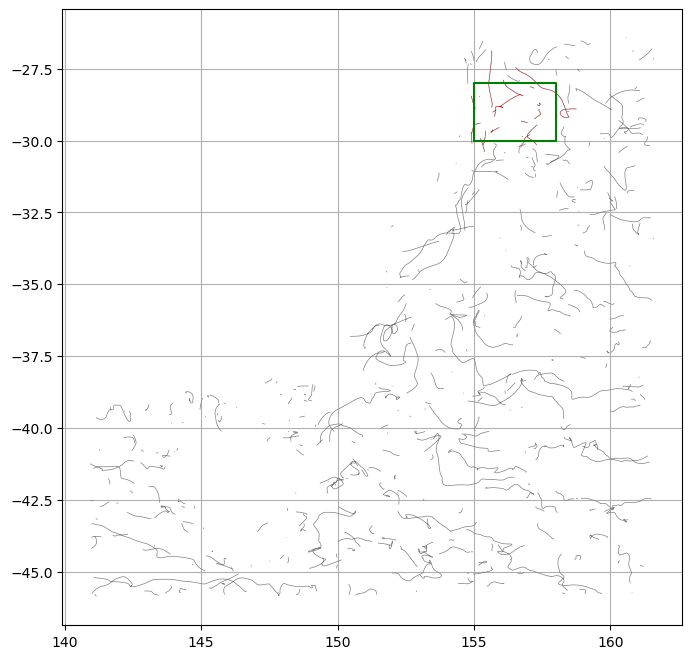

In [71]:
fig, ax = plt.subplots(figsize=(8,8))
ax.grid()
eddies_area_tracker.plot(ax, color='grey', lw=0.5, ref=-10, label="All tracks")
eddy_subset.plot(
    ax, color='r', lw=0.2, ref=-10, label="selected tracks"
)
ax.plot(
    (x0, x0, x1, x1, x0),
    (y0, y1, y1, y0, y0),
    color='g',
    lw=1.5,
    label='Box of selection'
)

Okay, so the above is handy say if we wanted to know how many of the eddies ended up in the EAC extension started upstream? Or something like that...

In [72]:
eddy = eddies_area_tracker.extract_ids([2])
eddy_f = eddies_area_tracker.extract_ids([2])
eddy_f.position_filter(median_half_window=1, loess_half_window=5)

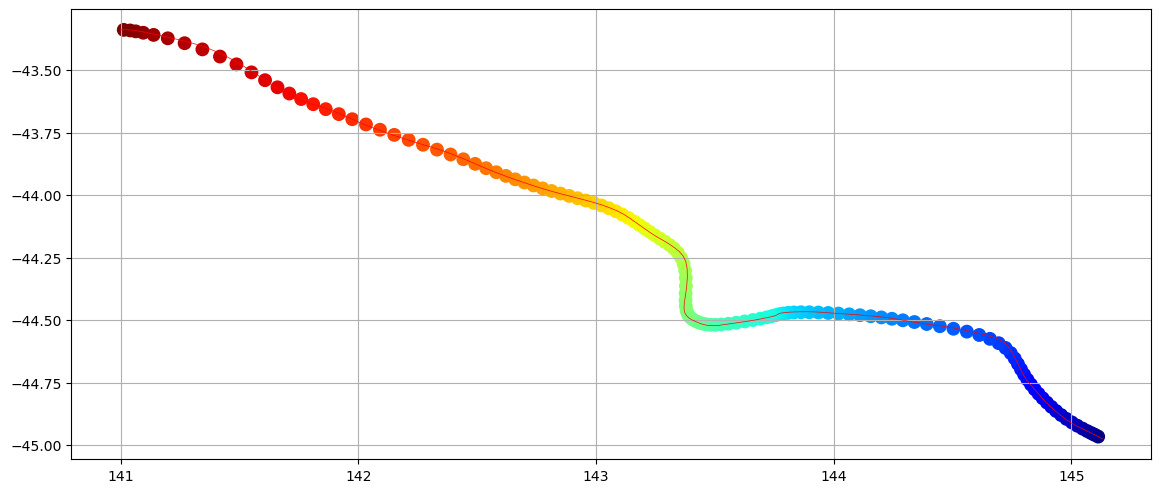

In [73]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_axes((0.05, 0.05, 0.9, 0.9))
ax.grid()
eddy.plot(ax, color='r', lw=0.5)
eddy_f.scatter(ax, 'n', cmap='jet', s=80)

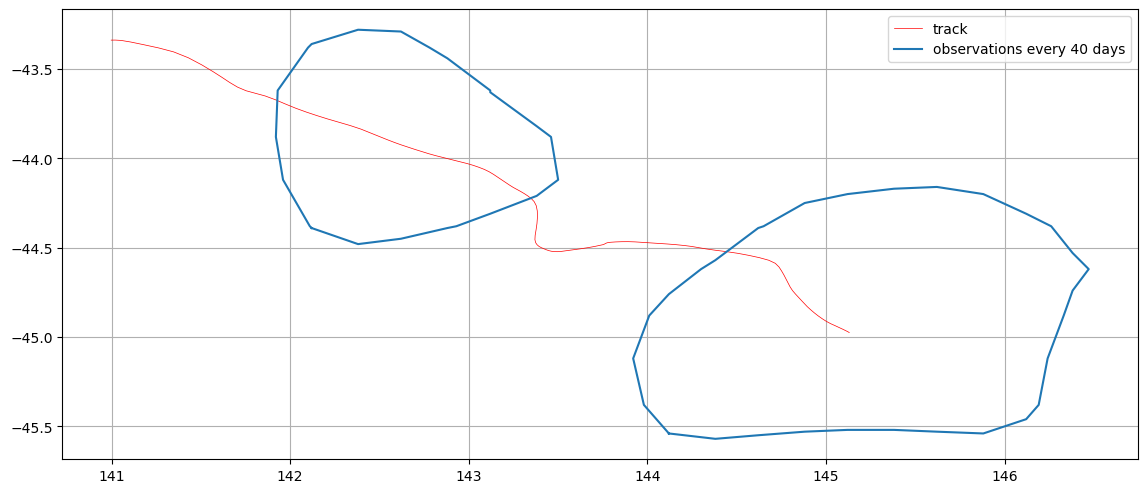

In [74]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes((0.05, 0.05, 0.9, 0.9))

ax.set_aspect("equal")
ax.grid()
eddy.plot(ax, color="r", lw=0.5, label="track")
eddy.index(range(0, len(eddy), 100)).display(
    ax, intern_only=True, label="observations every 40 days"
)
ax.legend()

# Summary
